In [15]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Открываем соединение с базой данных
conn = sqlite3.connect('F24.ML.Assignment.One.data.db')

# Извлекаем данные из таблицы order_busket
order_busket_df = pd.read_sql_query("SELECT * FROM order_busket", conn)

# Извлекаем данные из других таблиц, например:
order_history_df = pd.read_sql_query("SELECT * FROM order_history", conn)
order_props_df = pd.read_sql_query("SELECT * FROM order_props", conn)
products_df = pd.read_sql_query("SELECT * FROM products", conn)

# Закрываем соединение
conn.close()

In [17]:
# Анализ выбросов в 'price' из order_busket_df

# Расчет Q1, Q3 и IQR для цены
prices = order_busket_df['price']
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Фильтрация выбросов (удаление значений, которые находятся за пределами IQR)
filtered_prices = prices[(prices >= (Q1 - 1.5 * IQR)) & (prices <= (Q3 + 1.5 * IQR))]

# Печать статистики
print(f"Количество выбросов до фильтрации: {len(prices) - len(filtered_prices)}")
print(f"Количество выбросов после фильтрации: {len(filtered_prices)}")

# Обновление данных после фильтрации
order_busket_df = order_busket_df[(order_busket_df['price'] >= (Q1 - 1.5 * IQR)) & 
                                  (order_busket_df['price'] <= (Q3 + 1.5 * IQR))]

# Проверка данных после фильтрации
print(order_busket_df.head())

Количество выбросов до фильтрации: 195736
Количество выбросов после фильтрации: 1155956
   id  store_id  order_id  product_id   price
0   0      5014  20562761      460217  42.660
1   1      5014  20562761      230021  14.220
2   2      3856  20562753      978719  47.242
3   3      3856  20562753      663639  13.430
4   4     10825  20562723      422385  54.510


In [19]:
from scipy.stats import zscore

# Применение Z-оценки для фильтрации выбросов
z_scores = zscore(order_busket_df['price'])

# Отбор данных, где Z-оценка не превышает порог (например, 3)
filtered_data_zscore = order_busket_df[np.abs(z_scores) < 3]

# Печать статистики
print(f"Количество выбросов после фильтрации Z-score: {len(order_busket_df) - len(filtered_data_zscore)}")
print(f"Размер данных после фильтрации Z-score: {len(filtered_data_zscore)}")

# Проверка данных после фильтрации
print(filtered_data_zscore.head())

Количество выбросов после фильтрации Z-score: 2233
Размер данных после фильтрации Z-score: 1153723
   id  store_id  order_id  product_id   price
0   0      5014  20562761      460217  42.660
1   1      5014  20562761      230021  14.220
2   2      3856  20562753      978719  47.242
3   3      3856  20562753      663639  13.430
4   4     10825  20562723      422385  54.510


In [21]:
# Изменение множителя IQR на 3 для более строгой фильтрации
filtered_prices_strict = prices[(prices >= (Q1 - 3 * IQR)) & (prices <= (Q3 + 3 * IQR))]

# Печать статистики после строгой фильтрации
print(f"Количество выбросов до строгой фильтрации: {len(prices) - len(filtered_prices_strict)}")
print(f"Количество выбросов после строгой фильтрации: {len(filtered_prices_strict)}")

# Обновление данных после строгой фильтрации
order_busket_df = order_busket_df[(order_busket_df['price'] >= (Q1 - 3 * IQR)) & 
                                  (order_busket_df['price'] <= (Q3 + 3 * IQR))]

# Проверка данных после фильтрации
print(order_busket_df.head())

Количество выбросов до строгой фильтрации: 151982
Количество выбросов после строгой фильтрации: 1199710
   id  store_id  order_id  product_id   price
0   0      5014  20562761      460217  42.660
1   1      5014  20562761      230021  14.220
2   2      3856  20562753      978719  47.242
3   3      3856  20562753      663639  13.430
4   4     10825  20562723      422385  54.510


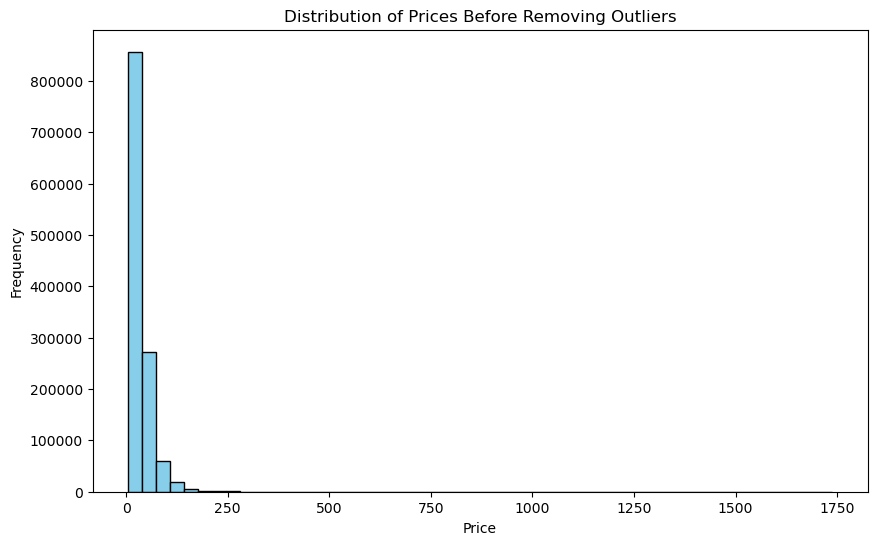

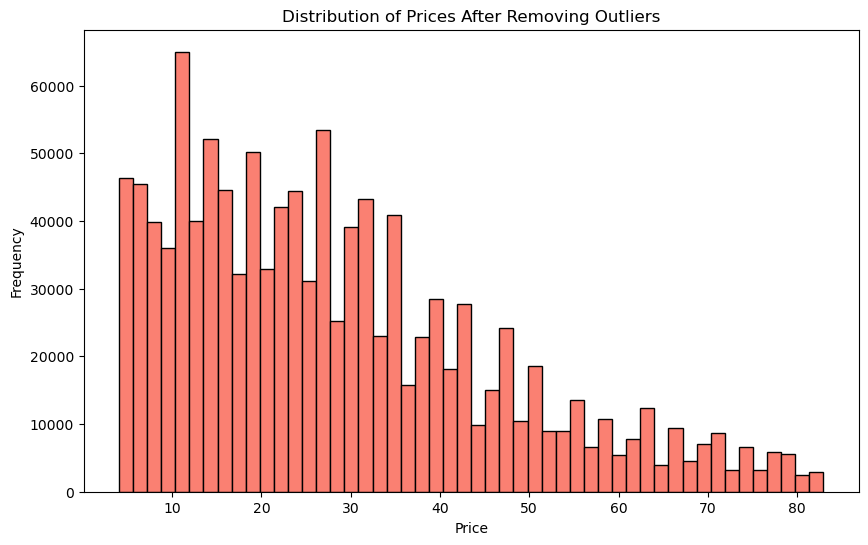

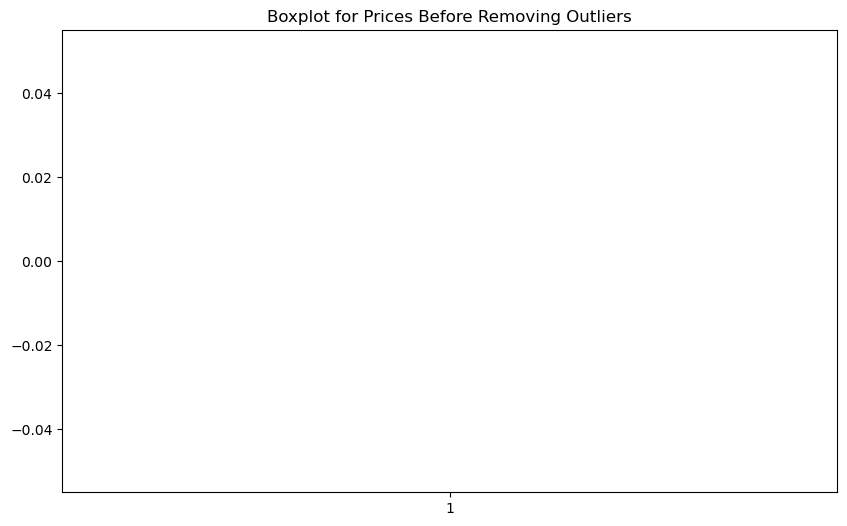

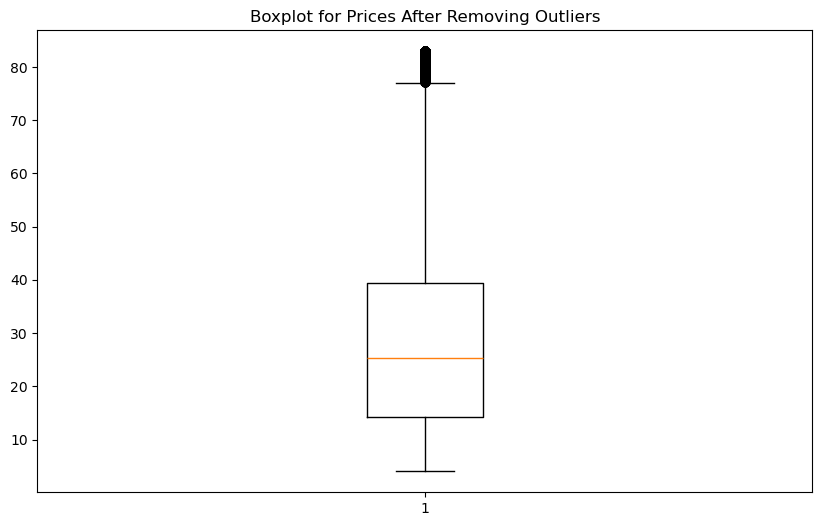

In [22]:
# Визуализация распределения цен до фильтрации
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices Before Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Визуализация распределения цен после фильтрации выбросов
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Prices After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot до фильтрации
plt.figure(figsize=(10, 6))
plt.boxplot(prices)
plt.title('Boxplot for Prices Before Removing Outliers')
plt.show()

# Boxplot после фильтрации
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_prices)
plt.title('Boxplot for Prices After Removing Outliers')
plt.show()

In [9]:
# Анализ выбросов в 'planned_prep_time' из order_history_df

# Расчет Q1, Q3 и IQR для времени приготовления
prep_times = order_history_df['planned_prep_time']
Q1 = prep_times.quantile(0.25)
Q3 = prep_times.quantile(0.75)
IQR = Q3 - Q1

# Фильтрация выбросов (удаление значений, которые находятся за пределами IQR)
filtered_prep_times = prep_times[(prep_times >= (Q1 - 1.5 * IQR)) & (prep_times <= (Q3 + 1.5 * IQR))]

# Печать статистики
print(f"Количество выбросов до фильтрации: {len(prep_times) - len(filtered_prep_times)}")
print(f"Количество выбросов после фильтрации: {len(filtered_prep_times)}")

# Обновление данных после фильтрации
order_history_df = order_history_df[(order_history_df['planned_prep_time'] >= (Q1 - 1.5 * IQR)) & 
                                    (order_history_df['planned_prep_time'] <= (Q3 + 1.5 * IQR))]

# Проверка данных после фильтрации
print(order_history_df.head())

Количество выбросов до фильтрации: 4319
Количество выбросов после фильтрации: 513291
   order_id STATUS_ID  store_id  planned_prep_time          DATE_CREATE
0  20562761         F      5014               15.0  2024-09-05 15:25:25
1  20562753         F      3856               10.0  2024-09-05 15:25:12
2  20562723         F     10825               20.0  2024-09-05 15:23:32
3  20562673         F      5640               20.0     2024-09-05 15:19
4  20562665         F      7283               15.0  2024-09-05 15:18:39


In [10]:
# Обработка выбросов для 'store_id' из order_busket_df

# Подсчёт частоты появления каждого store_id
store_id_counts = order_busket_df['store_id'].value_counts()

# Фильтрация редких значений (например, исключение магазинов с менее чем 5 заказами)
stores_to_keep = store_id_counts[store_id_counts >= 5].index
filtered_store_data = order_busket_df[order_busket_df['store_id'].isin(stores_to_keep)]

# Печать статистики
print(f"Количество исключенных магазинов: {len(order_busket_df) - len(filtered_store_data)}")

# Обновление данных после фильтрации
order_busket_df = filtered_store_data

# Проверка данных после фильтрации
print(order_busket_df.head())

# То же для 'product_id' (по аналогии с 'store_id')
product_id_counts = order_busket_df['product_id'].value_counts()
products_to_keep = product_id_counts[product_id_counts >= 5].index
filtered_product_data = order_busket_df[order_busket_df['product_id'].isin(products_to_keep)]

# Печать статистики
print(f"Количество исключенных продуктов: {len(order_busket_df) - len(filtered_product_data)}")

# Обновление данных после фильтрации
order_busket_df = filtered_product_data

# Проверка данных после фильтрации
print(order_busket_df.head())

Количество исключенных магазинов: 155
   id  store_id  order_id  product_id   price
0   0      5014  20562761      460217  42.660
1   1      5014  20562761      230021  14.220
2   2      3856  20562753      978719  47.242
3   3      3856  20562753      663639  13.430
4   4     10825  20562723      422385  54.510
Количество исключенных продуктов: 45458
   id  store_id  order_id  product_id   price
0   0      5014  20562761      460217  42.660
1   1      5014  20562761      230021  14.220
2   2      3856  20562753      978719  47.242
3   3      3856  20562753      663639  13.430
4   4     10825  20562723      422385  54.510
